<a href="https://colab.research.google.com/github/ThisaraJayas/1D-Convolution/blob/main/Flower_recog_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [13]:
import os

# Check if the file exists in the target folder
moved_file_path = "/content/drive/MyDrive/Flower Recognition/Flower_recog_Model.ipynb"

if os.path.exists(moved_file_path):
    print(f"Notebook successfully moved to {moved_file_path}")
else:
    print("The notebook was not found in the target folder.")

Notebook successfully moved to /content/drive/MyDrive/Flower Recognition/Flower_recog_Model.ipynb


In [14]:
count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

FileNotFoundError: [Errno 2] No such file or directory: 'Images/'

In [16]:
import os

# Change the working directory to the folder containing the notebook
new_dir = '/content/drive/MyDrive/Flower Recognition/'  # Update this to the correct path

os.chdir(new_dir)
print("Current Directory:", os.getcwd())

# Now list the files to ensure you are in the correct directory
print("Contents:", os.listdir())


Current Directory: /content/drive/MyDrive/Flower Recognition
Contents: ['Flower_recog_Model.ipynb', 'Images', 'Sample', '.ipynb_checkpoints']


In [17]:
count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

sunflower Folder has 733 Images
tulip Folder has 984 Images
daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 786 Images
Images Folder has 4319 Images


In [18]:
#Load Images into Arrays as Dataset

In [19]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [20]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4319 files belonging to 5 classes.
Using 3456 files for training.
Found 4319 files belonging to 5 classes.
Using 863 files for validation.


In [21]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [22]:
import matplotlib.pyplot as plt

In [23]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [24]:
AUTOTUNE = tf.data.AUTOTUNE

In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [26]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [27]:
#Data Augmentation

In [28]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


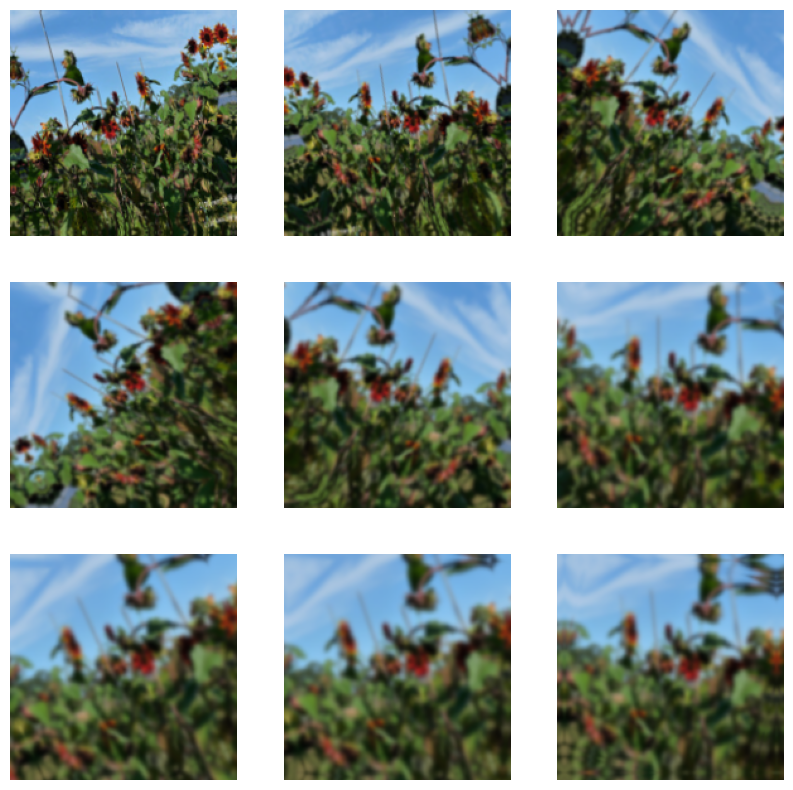

In [29]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [30]:
#MOdel Creation

In [31]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.3158 - loss: 1.5384 - val_accuracy: 0.5678 - val_loss: 1.0917
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.5843 - loss: 1.0505 - val_accuracy: 0.5863 - val_loss: 1.1325
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6214 - loss: 0.9796 - val_accuracy: 0.6095 - val_loss: 0.9609
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.6517 - loss: 0.8863 - val_accuracy: 0.6176 - val_loss: 0.9691
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6743 - loss: 0.8446 - val_accuracy: 0.6605 - val_loss: 0.8585
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6993 - loss: 0.8120 - val_accuracy: 0.6686 - val_loss: 0.8209
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.7259 - loss: 0.7314 - val_accuracy: 0.6952 - val_loss: 0.7996
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7376 - loss: 0.6911 - val_accu

In [35]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [38]:
classify_images('Sample/rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'The Image belongs to rose with a score of 56.67405724525452'